<a href="https://colab.research.google.com/github/drsubirghosh2008/drsubirghosh2008/blob/main/PW_Assignment_Module_27_Dimensionality_Reduction_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment:

Objective:

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:

Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine).
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

Deliverables:

Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.

Additional Information:

You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

Answer:

To implement PCA on the wine dataset and analyze the results, follow these steps:

1. Dataset Download and Preparation

Download the Wine Dataset from the UCI Machine Learning Repository.
Load the dataset into a Pandas DataFrame.
Inspect the dataset to understand its structure and ensure it is properly loaded.

2. Dataset Splitting

Separate the dataset into features (independent variables) and the target variable (dependent variable, typically wine class).

3. Data Preprocessing

Handle missing values (if any). However, this dataset typically does not have missing values.
Scale the features using StandardScaler from scikit-learn to standardize them with zero mean and unit variance. PCA works better with standardized data.

4. PCA Implementation

Use PCA from the scikit-learn library to perform Principal Component Analysis.
Determine the optimal number of components to retain by examining the explained variance ratio.
Visualize the cumulative explained variance ratio to help decide on the number of components.

5. PCA Visualization

Create a scatter plot for the first two principal components, colored by the target variable.

6. Clustering on PCA-transformed Data

Apply the K-Means clustering algorithm to the PCA-transformed data.
Evaluate clustering performance using metrics such as silhouette score, inertia, or adjusted Rand index (if true labels are known).

7. Results Interpretation

Summarize findings from PCA (e.g., how much variance is retained with the selected components).
Discuss clustering results (e.g., how well the clusters align with the original wine classes).

Code Outline
Here’s a step-by-step outline of the code for your Jupyter Notebook:

In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Dataset

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=column_names)


In [3]:
# Data Preprocessing

# Split into features and target
X = wine_df.iloc[:, 1:]  # Features
y = wine_df.iloc[:, 0]   # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


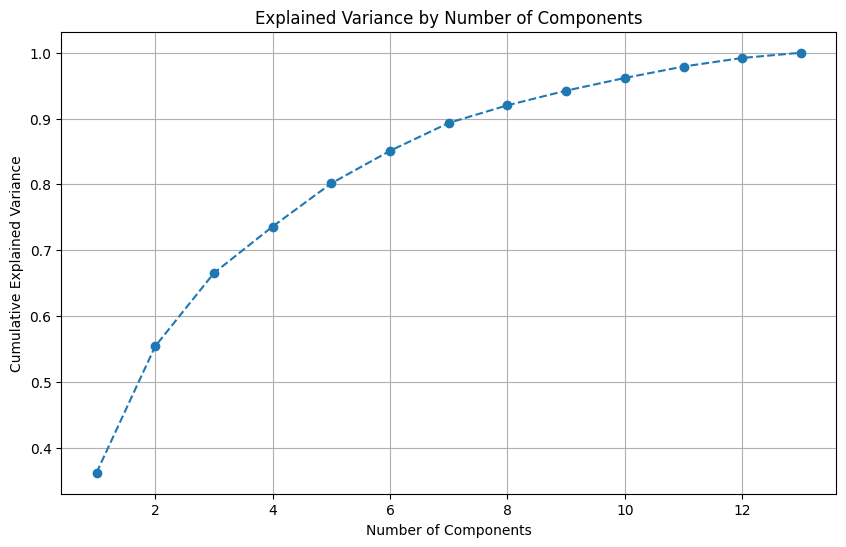

In [4]:
# PCA Implementation

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()


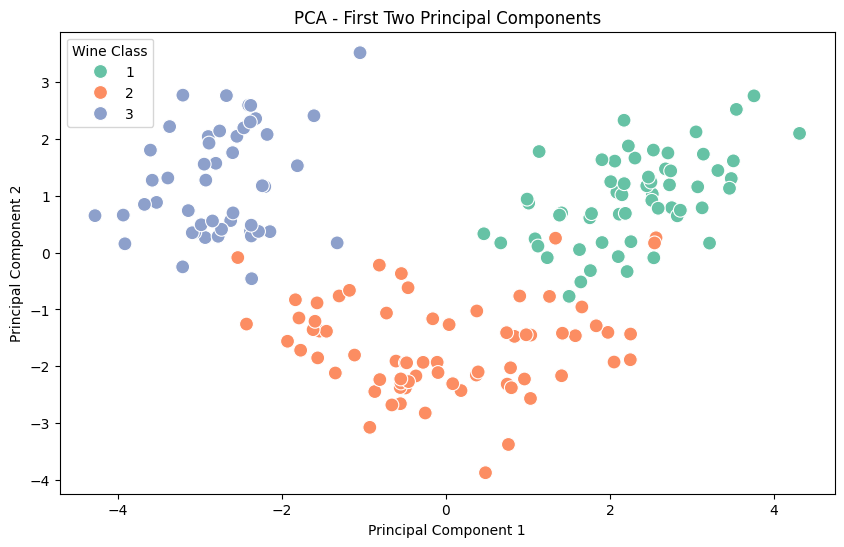

In [5]:
# Visualization

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.legend(title='Wine Class')
plt.show()


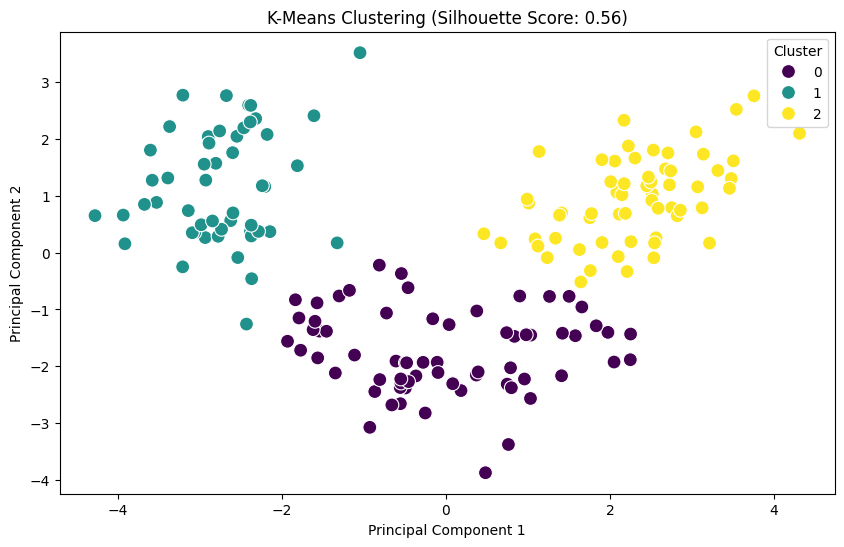

In [6]:
# Clustering

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :2])  # Using first 2 principal components

# Evaluate clustering
silhouette = silhouette_score(X_pca[:, :2], clusters)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (Silhouette Score: {silhouette:.2f})')
plt.legend(title='Cluster')
plt.show()


In [7]:
# Summary Table

from sklearn.metrics import adjusted_rand_score

# Example: Adjusted Rand Index
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.2f}")


Adjusted Rand Index: 0.90


Deliverables:


Jupyter Notebook: Include all the code and visualizations described above.

Report: A concise PDF or markdown file summarizing:

The optimal number of PCA components.

How much variance was retained.

Clustering results and interpretation (e.g., silhouette score, alignment with true labels).

Scatter plots and their implications.

**Thank You!**